In [1]:
import modern_robotics as mr
import sympy as sp
from sympy import*
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()
from Utilities.symbolicFunctions import *
from Utilities.kukaKinematics import*


# TASK 2

#### 1. Using the original Denavit-Hartenberg convention, determine the Denavit-Hartenberg parameters for the Agilus robot.

In [44]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')

config = sp.Matrix([[sp.pi,0,-400,th1],[sp.pi/2,25,0,th2 + sp.pi/2],[0,455,0,th3],[sp.pi/2, 35, -420, th4],[-sp.pi/2,0,0,th5],[sp.pi/2, 0, 0,th6]])
config

⎡ π    0   -400    θ₁  ⎤
⎢                      ⎥
⎢ π                   π⎥
⎢ ─   25    0    θ₂ + ─⎥
⎢ 2                   2⎥
⎢                      ⎥
⎢ 0   455   0      θ₃  ⎥
⎢                      ⎥
⎢ π                    ⎥
⎢ ─   35   -420    θ₄  ⎥
⎢ 2                    ⎥
⎢                      ⎥
⎢-π                    ⎥
⎢───   0    0      θ₅  ⎥
⎢ 2                    ⎥
⎢                      ⎥
⎢ π                    ⎥
⎢ ─    0    0      θ₆  ⎥
⎣ 2                    ⎦

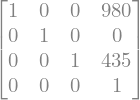

In [3]:
# oopg 1 Sicilliano
# a alfa    d   v
# sic_conf = sp.Matrix([[0,0,0,th1], [25,sp.pi/2,0,th2+sp.pi/2], [455,0,0,th3], [35,sp.pi/2,-420,th4], [0,-sp.pi/2,0,th5], [0,sp.pi/2,-80,th6]])
# sic_conf
M

#### 2. Determine the end-effector zero position configuration M ∈ SE(3) for the Agilus robot

In [56]:
Mi = sp.Matrix([[sp.eye(4)]*6])

for i in range(6):
    if i == 0:
        Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2])
    
    elif i == 2:
        Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2]) * rotZ(-sp.pi/2) # We compansate for the rotation of -pi/2 done when finding the D-H parameters 
    
    elif i == 5:
        Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2])
    
    else:
        Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2]) 

M = sp.eye(4)
for n in range(5,-1,-1):
    M = Mi[:,4*n:4*(n+1)] * M


M = M * Tnb
M

⎡1  0  0  980⎤
⎢            ⎥
⎢0  1  0   0 ⎥
⎢            ⎥
⎢0  0  1  435⎥
⎢            ⎥
⎣0  0  0   1 ⎦

In [5]:
# oppg 2 # Snart siciliano
# Mi = sp.Matrix([[sp.eye(4)]*6])

# for i in range(6):
#     if i == 1:
#         Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2]) #* rotZ(-sp.pi/2) # We compansate for the rotation of -pi/2 done when finding the D-H parameters 
#     else:
#         Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2])

# M = sp.eye(4)
# for n in range(5,-1,-1):
#     M = Mi[:,4*n:4*(n+1)] * M


# M

#### 3. Determine the space frame screw axes Si for the Agilus robot.

In [57]:
Ai = sp.Matrix([[0,-1,0,0],[1,0,0,0],[0,0,0,0],[0,0,0,0]]) # This is a given matrix due to revolute joints

S_sp = sp.zeros(6)
for i in range(6):
    dot_sum = sp.eye(4)
    for n in range(i,-1,-1):
        dot_sum = Mi[:,4*n:4*(n+1)] * dot_sum
    S_skew = dot_sum * Ai * sp.Inverse(dot_sum)
    S_sp[0,i] = S_skew[2,1] 
    S_sp[1,i] = S_skew[0,2] 
    S_sp[2,i] = S_skew[1,0] 
    S_sp[3,i] = S_skew[0,3] 
    S_sp[4,i] = S_skew[1,3]
    S_sp[5,i] = S_skew[2,3] 

S_sp

⎡0    0     0     -1    0     -1 ⎤
⎢                                ⎥
⎢0    1     1     0     1     0  ⎥
⎢                                ⎥
⎢-1   0     0     0     0     0  ⎥
⎢                                ⎥
⎢0   -400  -400   0    -435   0  ⎥
⎢                                ⎥
⎢0    0     0    -435   0    -435⎥
⎢                                ⎥
⎣0    25   480    0    900    0  ⎦

#### 4. Determine the body-frame screw axes Bi for the Agilus robot

In [58]:
M_inv = mr.TransInv(M)          #Finding inverse of M
Ad_M_inv = mr.Adjoint(M_inv)    #Computing [Ad_M^-1]

#Using B_i = [Ad_M^-1]S_i
S_bp = sp.zeros(6,6)
for i in range(6):
     S_bp[:, i] = Ad_M_inv * S_sp[:, i]

S_bp

⎡ 0     0     0    -1   0   -1⎤
⎢                             ⎥
⎢ 0     1     1    0    1   0 ⎥
⎢                             ⎥
⎢ -1    0     0    0    0   0 ⎥
⎢                             ⎥
⎢ 0     35    35   0    0   0 ⎥
⎢                             ⎥
⎢-980   0     0    0    0   0 ⎥
⎢                             ⎥
⎣ 0    -955  -500  0   -80  0 ⎦

### 5. Visualization 
#### Visualization using custom class in Utilities module. The big coordinate system being the {s}-frame and joint-frames oriented with z-axis along joint screw-axis.
#### Axis colours:
####    -Blue   -Z axis and joint screw-axis
####    -Red    -X axis
####    -Green  -Y axis

In [8]:
from Utilities.RobotClass import*
import numpy as np
from Utilities.kukaKinematics import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [51]:
#DH frames:

#Finding T01, T02..., from DH formulation Mi
Tlist_DH = np.zeros((6,4,4))      

T = sp.eye(4)
for i in range(6):          
    T = T * Mi[:,4*i:4*(i+1)]
    Tlist_DH[i] = T

#Visualize frames
Kuka_DH = Robot(Tlist_DH,['z','x','x','y','z','z'], Tnb)
Kuka_DH.joints[5].set_colour([1,0,0])
Kuka_DH.draw_robot()


WebVisualizer(window_uid='window_7')

In [10]:
Kuka_DH.transform(Slist,[0,0,np.pi/2,0,0,0])
Kuka_DH.joints[2].set_colour([0,0,1])
T = Kuka_DH.current_config
Kuka_DH.draw_robot()

WebVisualizer(window_uid='window_1')

In [11]:
#Kuka robot visualized in zero-config, showing M (red) and all Screw axes as the joint frames' z-axis.
from Utilities.kukaKinematics import Mlist, Slist, Tnb

Kuka = Robot(Mlist, ['z', '-z', 'x', 'x', '-z','x'], Tnb) # With endeffector offset by Tnb

In [12]:
Kuka.joints[5].set_colour([1,0,0])
Kuka.draw_robot()

WebVisualizer(window_uid='window_2')

In [13]:
Kuka.transform(Slist,[0,0,np.pi/2,0,0,0])
T = Kuka.current_config

In [14]:
Tsb = T[5]
Tsb

⎡        1.0            0   -1.11022302462516e-16  515.0⎤
⎢                                                       ⎥
⎢         0            1.0            0              0  ⎥
⎢                                                       ⎥
⎢1.11022302462516e-16   0            1.0           -20.0⎥
⎢                                                       ⎥
⎣         0             0             0             1.0 ⎦

In [15]:
Kuka.draw_robot()


WebVisualizer(window_uid='window_3')

In [16]:
Kuka.transform(Slist,[0,-np.pi/2,np.pi/2,0,0,0])
Kuka.draw_robot()

WebVisualizer(window_uid='window_4')